In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df=df.drop(['petal length (cm)','petal width (cm)'],axis='columns')

In [10]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

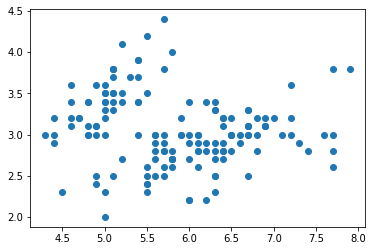

In [12]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [14]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

In [15]:
sse

[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 27.990212038303703,
 21.00466066066067,
 17.613271697499638,
 14.756476273726275,
 12.843135057471263,
 11.110947537969277]

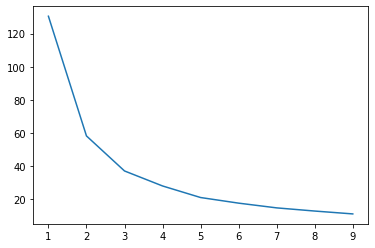

In [16]:
plt.plot(k_range,sse)

In [18]:
k=KMeans(n_clusters=3)
df['cluster']=k.fit_predict(df[['sepal length (cm)','sepal width (cm)']])

In [19]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

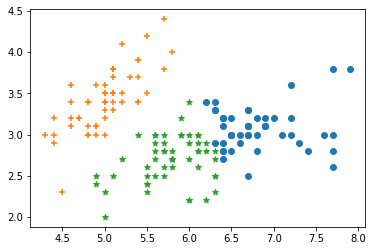

In [20]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker="+")
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],marker="*")

In [21]:
scaler=MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)']=scaler.transform(df[['sepal length (cm)']])
df


,sepal length (cm),sepal width (cm),cluster
0,0.222222,3.5,1
1,0.166667,3.0,1
2,0.111111,3.2,1
3,0.083333,3.1,1
4,0.194444,3.6,1
...,...,...,...
145,0.666667,3.0,0
146,0.555556,2.5,2
147,0.611111,3.0,0
148,0.527778,3.4,0


In [33]:
scaler=MinMaxScaler()
scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)']=scaler.transform(df[['sepal width (cm)']])
df


,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,0
146,0.555556,0.208333,2
147,0.611111,0.416667,0
148,0.527778,0.583333,0


In [34]:
k=KMeans(n_clusters=3)
df['cluster']=k.fit_predict(df[['sepal length (cm)','sepal width (cm)']])

In [35]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

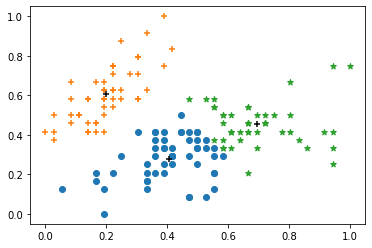

In [36]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker="+")
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],marker="*")
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],marker="+",color="black")

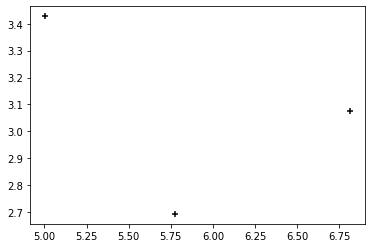

In [31]:
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],marker="+",color="black")